### 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
Correlaciones = []
d = np.load('proyecto_training_data.npy') 
df = pd.DataFrame(d)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).

In [2]:
Porcentaje = int(df[0].count()*.8)
Porcentaje

1168

In [3]:
Set_Entrenamiento = df.iloc[:Porcentaje]
Set_Entrenamiento

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [4]:
Set_Pruebas = df.iloc[Porcentaje:]
Set_Pruebas

,0,1,2,3,4,5
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):

   * Media
   * Valor máximo
   * Valor mínimo
   * Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
   * Desviación estándar.


In [5]:
Media = Set_Entrenamiento.mean(axis=0)
Valor_Maximo =  Set_Entrenamiento.max(axis=0)
Valor_Minimo = Set_Entrenamiento.min(axis=0)
Desviacion_Estandar = Set_Entrenamiento.std(axis=0)
Rango = Set_Entrenamiento.ndim

Resultados = ({'Media':pd.Series(Media,dtype=float), 'Valor_Maximo':pd.Series(Valor_Maximo,dtype=float), 'Valor_Minimo':pd.Series(Valor_Minimo,dtype=float),
             'Desviacion_Estandar':pd.Series(Desviacion_Estandar,dtype=float), 'Rango':pd.Series(Rango)})
dfAnalisis = pd.DataFrame(Resultados)
dfAnalisis

,Media,Valor_Maximo,Valor_Minimo,Desviacion_Estandar,Rango
0,180590.277397,755000.0,34900.0,78815.697902,2.0
1,6.101027,10.0,1.0,1.378025,NaN
2,1156.323630,3228.0,334.0,373.780374,NaN
3,6.485445,14.0,2.0,1.609141,NaN
4,1971.451199,2010.0,1875.0,29.951707,NaN
5,69.946985,313.0,21.0,23.478161,NaN


In [6]:
Set_Entrenamiento.describe()

,0,1,2,3,4,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

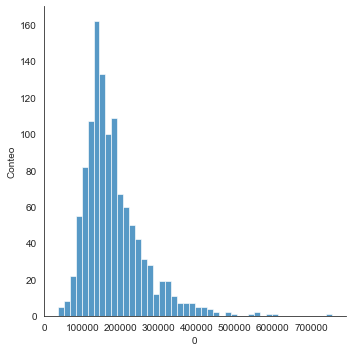

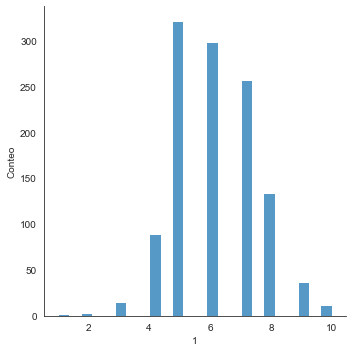

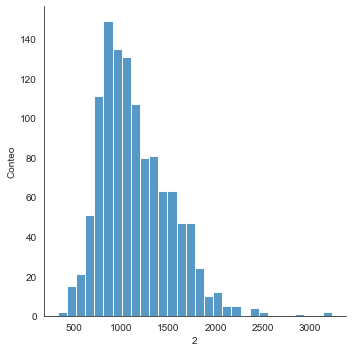

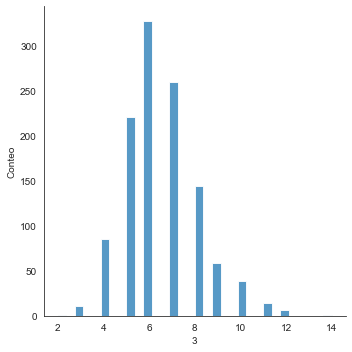

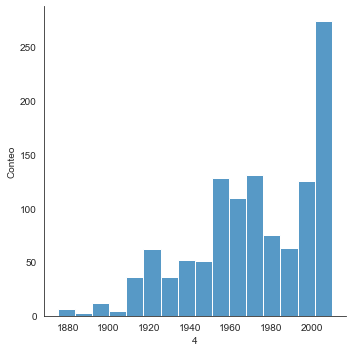

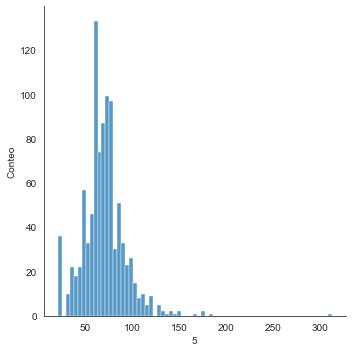

In [7]:
for i in Set_Entrenamiento.columns.values:
    sns.displot(Set_Entrenamiento[i])
    plt.xlabel(i)
    plt.ylabel('Conteo')
    plt.show()

### 5. Para cada variable independiente x :
   * Calcular el coeficiente de orrelación entre x y y.
   * Graficar x vs y(scatterplot) usando matplotlib.
   * Colocar el coeficiente de correlación y colocarlo como parte del título  de la gráfica.
   * Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.

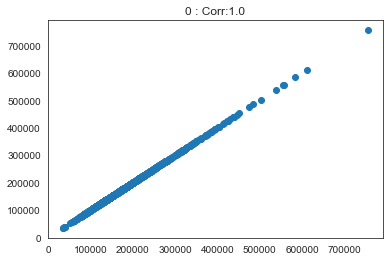

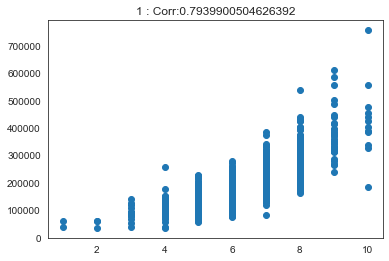

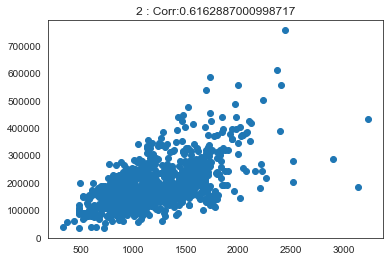

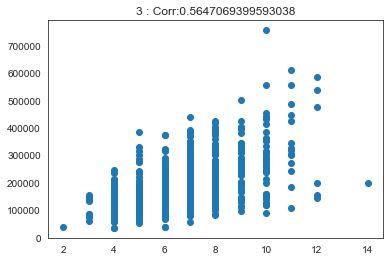

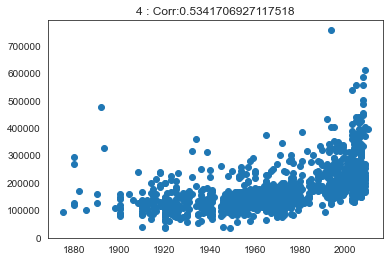

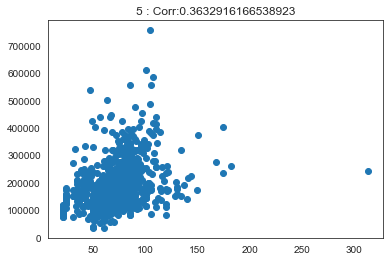

In [8]:
for i in Set_Entrenamiento.columns.values:
    Correlacion = (pd.DataFrame(Set_Entrenamiento[[i,0]]).corr().iloc[0,1])
    Correlaciones.append(Correlacion)
    plt.scatter(Set_Entrenamiento[i], Set_Entrenamiento[0])
    plt.title(str(i)+ ' : Corr:'+str((Correlacion)))
    plt.show()

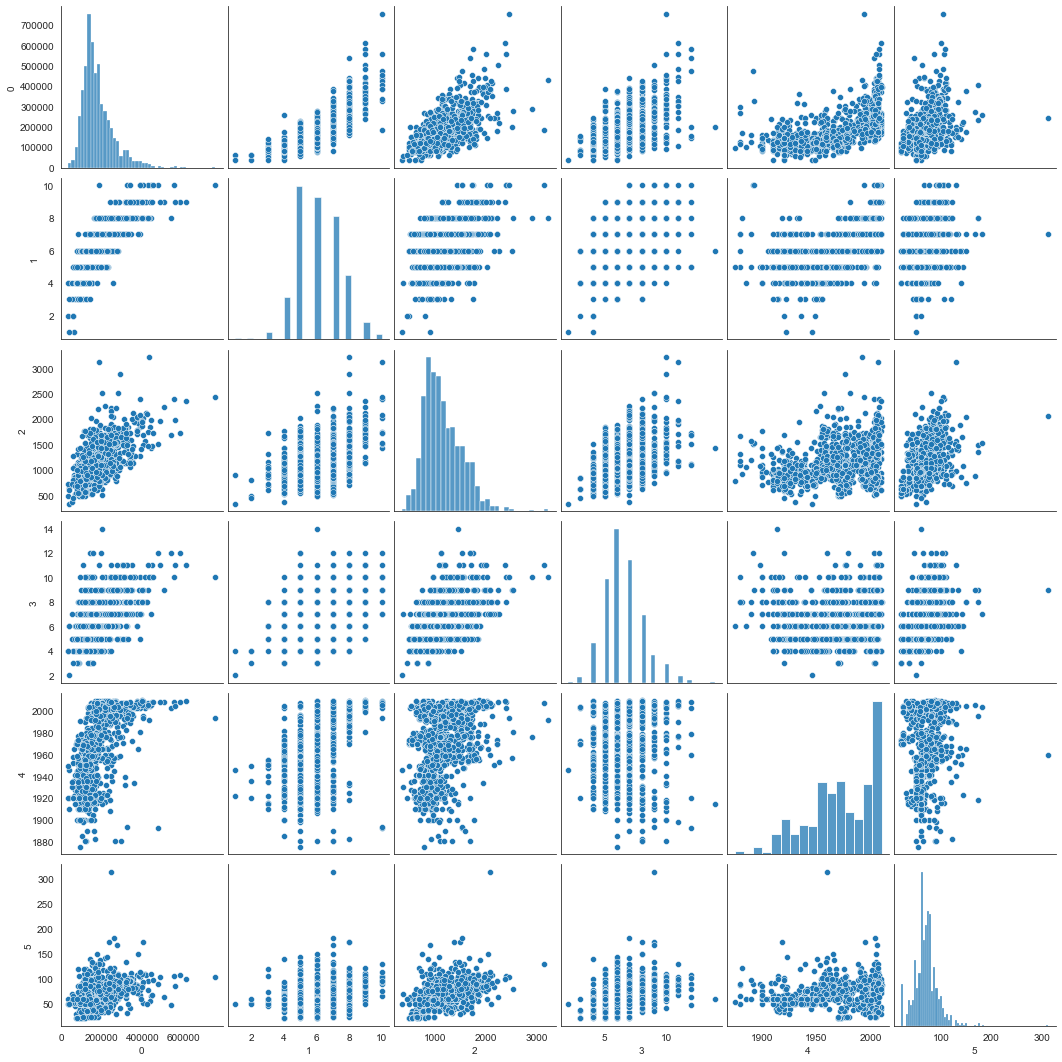

In [9]:
sns.pairplot(Set_Entrenamiento)

In [10]:
Mejor_Potencial = pd.DataFrame({'Correlaciones':Correlaciones}, index=[Set_Entrenamiento.columns.values])

In [11]:
Mejor_Potencial['Correlaciones'].nlargest(3)[1:3]

1    0.793990
2    0.616289
Name: Correlaciones, dtype: float64